<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Series de tiempo</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego discutiendo con chatgpt.</small>
</p>

Sea $\varepsilon_t$ un proceso estocástico discreto de valores reales. El proceso $\varepsilon_t$ sigue un modelo $\operatorname{ARCH}(p)$ (AutoRegressive Conditional Heteroscedasticity) si:
\begin{equation*}
    \begin{aligned}
        &\varepsilon_t | F_{t-1} \sim \mathcal{N}\left(0, \sigma_t^2\right), \\
        &\sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \varepsilon_{t-i}^2
    \end{aligned}
\end{equation*}
        
donde $p \geq 0$, $\omega > 0$, $\alpha_i \geq 0$ para $i = 1, \ldots, p$. Donde $F_{t-1}$ denota la información hasta el momento $t-1$.


Luego es claro que
\begin{equation*}
    \begin{aligned}
        \varepsilon_0 & \sim N(0,\sigma_0^2)=N(0,\omega)\\
        \varepsilon_1 & \sim N(0,\sigma_1^2)=N(0,\omega+\alpha_1\varepsilon_0^2)\\
        \varepsilon_2 & \sim N(0,\sigma_2^2)=N(0,\omega+\alpha_1\varepsilon_1^2+\alpha_2\varepsilon_0^2)\\
        \vdots &\\
        \varepsilon_p & \sim N(0,\sigma_p^2)=N(0,\omega+\alpha_1\varepsilon_{p-1}^2+\cdots+\alpha_p\varepsilon_0^2)\\
        \varepsilon_t & \sim N(0,\sigma_t^2),\quad \sigma_t^2=\omega+\sum_{i=1}^p\alpha_i\varepsilon_{t-1}^2, \quad t\geq p
    \end{aligned}
\end{equation*}

Sea $\varepsilon_t$ un proceso estocástico discreto de valores reales. Entonces $\varepsilon_t$ sigue un modelo GARCH$(p, q)$ (Generalized AutoRegressive Conditional Heteroscedasticity) si y s\'olo si:
\begin{equation*}
    \begin{aligned}
        &\varepsilon_t | F_{t-1} \sim \mathcal{N}\left(0, \sigma_t^2\right),\\
        &\sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \varepsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2
    \end{aligned}
\end{equation*}
        
donde $p \geq 0$, $q \geq 0$, $\omega > 0$, $\alpha_i \geq 0$ para $i = 1, \ldots, p$, y $\beta_j \geq 0$ para $j = 1, \ldots, q$. Donde $F_{t-1}$ denota la información hasta el momento $t-1$.

# yfinance

In [2]:
import pandas as pd
import yfinance as yf
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Define the ticker symbol for S&P 500
symbol = "^GSPC"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Display the first few rows of the data
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


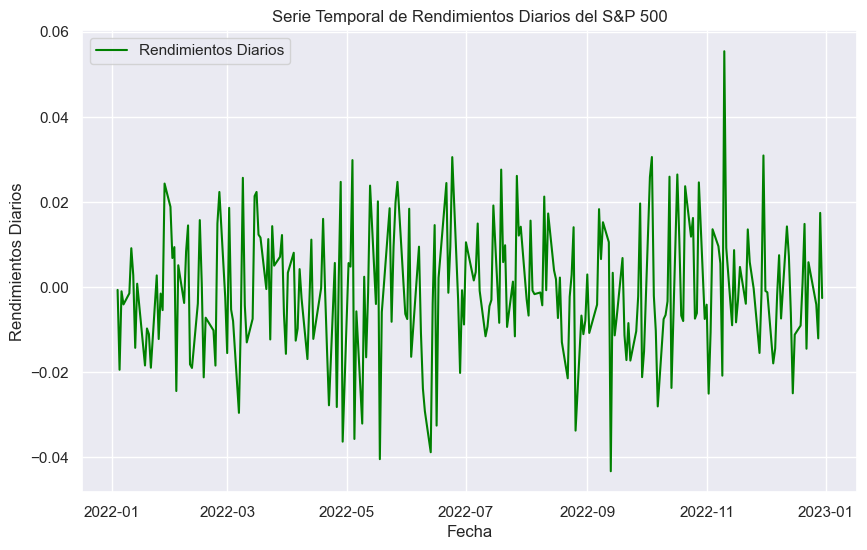

In [5]:
# Set the seaborn style to match the presentation aesthetic
sns.set(style="darkgrid")

# Plot the time series with green color
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], color='green', label='Rendimientos Diarios')
plt.title('Serie Temporal de Rendimientos Diarios del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos Diarios')
plt.legend()
plt.show()

# ARCH library

In [6]:
#pip install arch

In [7]:
import numpy as np
import pandas as pd
from arch import arch_model
 
np.random.seed(0)
returns = np.random.normal(loc=0.001, scale=0.01, size=1000)
 
date_range = pd.date_range(start='2023-01-01', periods=len(returns), freq='B')
data = pd.DataFrame(data={'Returns': returns}, index=date_range)
 
p = 1
q = 1
model = arch_model(data['Returns'], vol='Garch', p=p, q=q)
results = model.fit()
print(results.summary())
forecast = results.forecast(horizon=1)
print("Forecasted volatility for the next day:", forecast.variance[-1:].values[0, 0])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 78567838.57317103
Iteration:      2,   Func. Count:     18,   Neg. LLF: 984369.6220633715
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3199.5088638704415
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3199.51
Distribution:                  Normal   AIC:                          -6391.02
Method:            Maximum Likelihood   BIC:                          -6371.39
                                        No. Observations:                 1000
Date:                Sat, Nov 18 2023   Df Residuals:                      999
Time:          

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

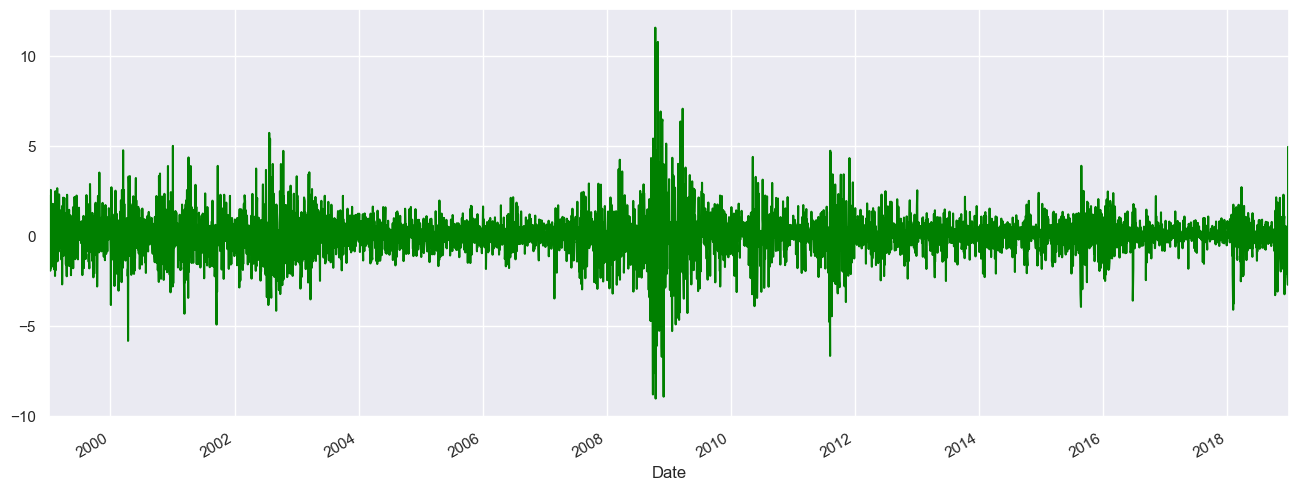

In [21]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot(color='green')
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

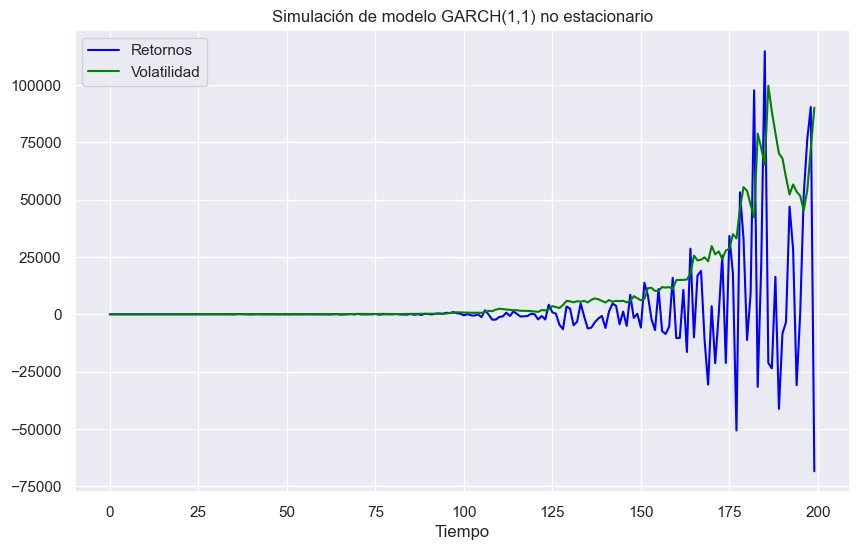

In [35]:
from arch import arch_model

# Function to simulate GARCH(1,1) model without stationarity
def simulate_garch(n_obs):
    # Generate random parameters
    alpha = np.random.uniform(0.5, 0.8)
    beta = np.random.uniform(0.5, 0.8)
    omega = np.random.uniform(0.5, 1.5)

    # Simulate GARCH(1,1) process
    np.random.seed(26)
    returns = np.zeros(n_obs)
    volatility = np.zeros(n_obs)

    for t in range(1, n_obs):
        epsilon = np.random.normal(size=1)
        volatility[t] = np.sqrt(omega + alpha * returns[t-1]**2 + beta * volatility[t-1]**2)
        returns[t] = volatility[t] * epsilon

    return returns, volatility

# Simulate GARCH(1,1) without stationarity with 500 observations
n_obs = 200
returns, volatility = simulate_garch(n_obs)

# Plot the simulated GARCH(1,1) process
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Retornos', color='blue')
plt.plot(volatility, label='Volatilidad', color='green')
plt.title('Simulación de modelo GARCH(1,1) no estacionario')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()